## Topic Modeling with BERTopic

https://github.com/MaartenGr/BERTopic

In [1]:
#%pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 kB 2.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 32.1 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 18.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 63.1 MB/s eta 0:00:0000:01:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.6 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 70.0 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [1]:
import os
import re
import pandas as pd
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

from bertopic import BERTopic

pd.set_option('display.max_colwidth', 500)

2023-05-25 04:30:38.677550: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-25 04:30:38.737453: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-25 04:30:38.738746: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-25 04:30:39.857515: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


#### Topic modeling on News Articles

In [2]:
news_df = pd.read_parquet("yelp_sentiments.parquet")
news_df.shape

(126817, 10)

In [3]:
neg_news_df = news_df[news_df["Sentiment"]=="Negative"]

In [5]:
neg_news_df.shape

(74045, 10)

In [6]:
# Lowercase text
neg_news_df['cleaned_text'] = neg_news_df['cleaned_text'].str.lower()

In [7]:
neg_news_df.drop('topic', axis=1, inplace=True)

In [8]:
%%time
# Remove stopwords
stop_words = stopwords.words('english')
stop_words.extend(['facebook'])
neg_news_df['cleaned_text'] = neg_news_df['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

docs = neg_news_df['cleaned_text'].tolist()

CPU times: user 2min 39s, sys: 630 ms, total: 2min 40s
Wall time: 2min 40s


### Training

Instantiate BERTopic and set language to `english` since our documents are in the English language. For a multi-lingual model we can use `language="multilingual"`. 

We will also calculate the topic probabilities. However, this can slow down BERTopic significantly at large amounts of data (>100_000 documents). It is advised to turn this off if you want to speed up the model.

In [9]:
%%time

topic_model = BERTopic(language="english", min_topic_size=100, n_gram_range=(1,2), calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(docs)

Batches:   0%|          | 0/2314 [00:00<?, ?it/s]

2023-05-25 04:44:56,726 - BERTopic - Transformed documents to Embeddings
2023-05-25 04:46:05,963 - BERTopic - Reduced dimensionality


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

2023-05-25 04:47:19,668 - BERTopic - Clustered reduced embeddings


CPU times: user 7h 52min 50s, sys: 1h 10min 20s, total: 9h 3min 11s
Wall time: 19min 32s


#### Review most frequent topics
**Note:** `-1` refers to all outliers and should typically be ignored. Next, let's take a look at a frequent topic that were generated:

In [10]:
freq = topic_model.get_topic_info()

print(f"Topics found: {freq.shape[0]}")
freq.head(10)

Topics found: 134


Topic  Count                                                Name
0     -1  32879                                 -1_ai_new_data_news
1      0   2382      0_releasesign_releasesign uplog_uplog_products
2      1   1556                    1_gray_gray media_media group_ai
3      2   1315                                   2_days_ai_new_day
4      3   1279                              3_public_radio_npr_air
5      4   1016                               4_mint_india_share_ai
6      5    962                       5_chatgpt_openai_gpt4_chatbot
7      6    867  6_venturebeat_us_twitterfollow us_us twitterfollow
8      7    841                         7_ai_data_business_learning
9      8    840                      8_microsoft_ago_hours ago_bing

In [11]:
topic_model.get_topic(0)  # Select the most frequent topic

[('releasesign', 0.01171456089448218),
 ('releasesign uplog', 0.011342528731767521),
 ('uplog', 0.011260990454589353),
 ('products', 0.010674312750453396),
 ('overviewview', 0.0102587355920722),
 ('public', 0.008509072786794707),
 ('services', 0.00799487807756114),
 ('consumer', 0.0075065606029447035),
 ('pr', 0.007083932302020377),
 ('industry', 0.006885717627145612)]

**NOTE**: BERTopic is stocastich which mmeans that the topics might differ across runs. This is mostly due to the stocastisch nature of UMAP.

### Visualize Topics
After having trained our `BERTopic` model, we can iteratively go through perhaps a hundred topic to get a good 
understanding of the topics that were extract. However, that takes quite some time and lacks a global representation. 
Instead, we can visualize the topics that were generated in a way very similar to 
[LDAvis](https://github.com/cpsievert/LDAvis):

CPU times: user 5min 37s, sys: 35.3 s, total: 6min 13s
Wall time: 6min 12s


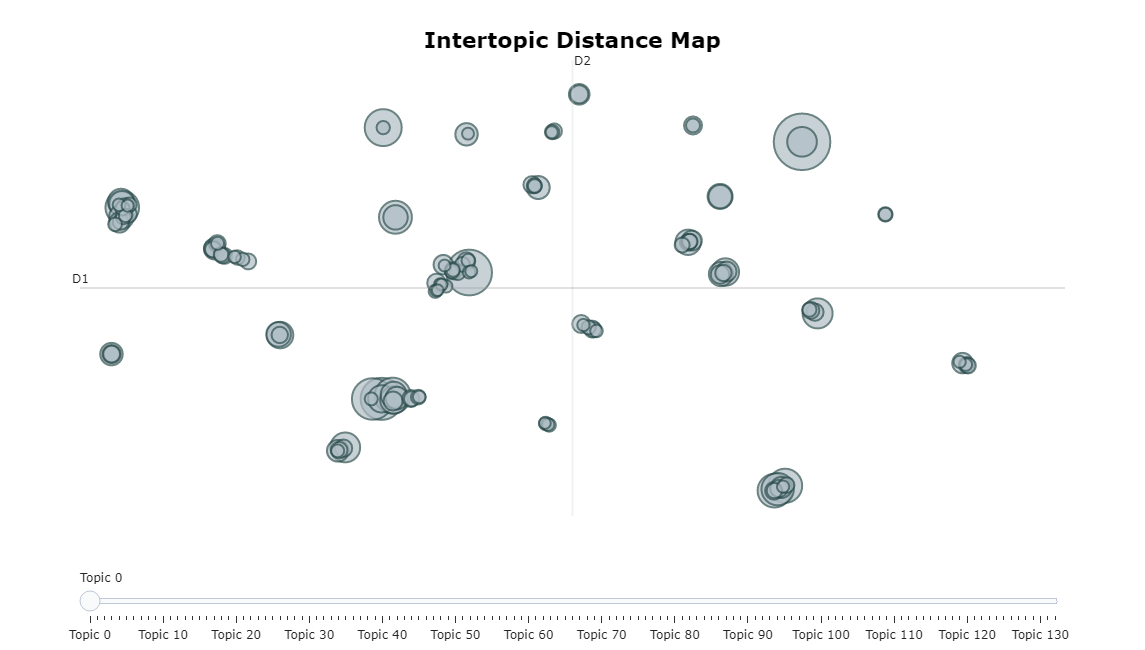

In [22]:
%%time

topic_model.visualize_topics()

#### Visualize Topic Probabilities

The variable `probabilities` that is returned from `transform()` or `fit_transform()` can be used to understand how confident BERTopic is that certain topics can be found in a document. 

#### Visualize Topic Hierarchy

The topics that were created can be hierarchically reduced. In order to understand the potential hierarchical structure of the topics, we can use scipy.cluster.hierarchy to create clusters and visualize how they relate to one another. This might help selecting an appropriate nr_topics when reducing the number of topics that you have created.

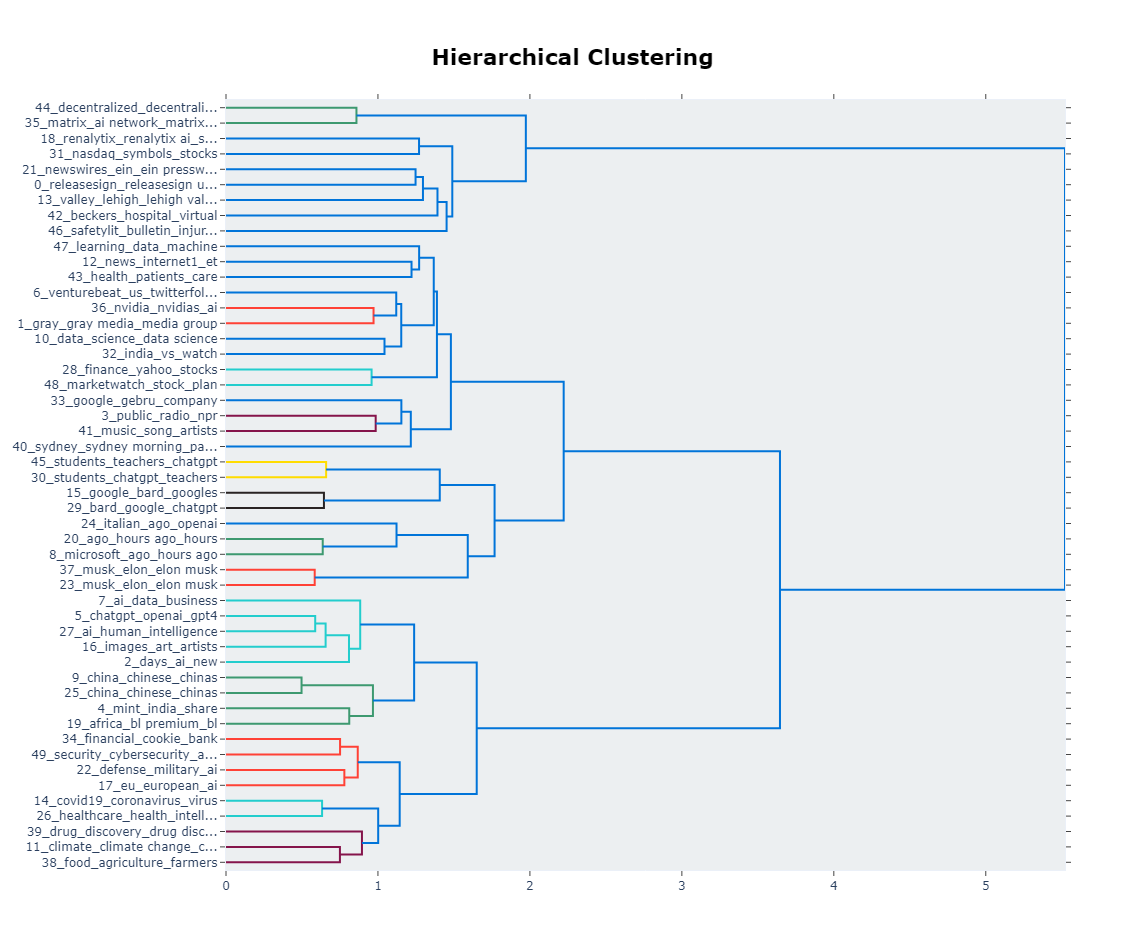

In [23]:
topic_model.visualize_hierarchy(top_n_topics=50)

#### Visualize Terms

We can visualize the selected terms for a few topics by creating bar charts out of the c-TF-IDF scores for each topic representation. Insights can be gained from the relative c-TF-IDF scores between and within topics. Moreover, you can easily compare topic representations to each other.

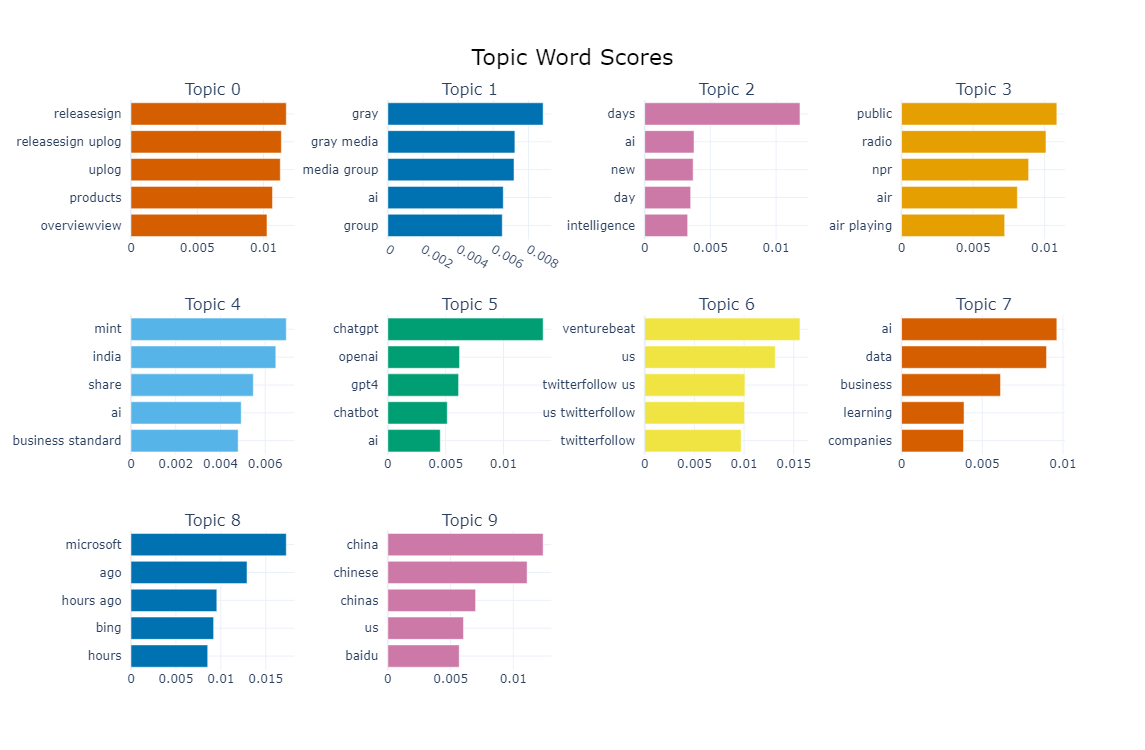

In [12]:
topic_model.visualize_barchart(top_n_topics=10)

In [13]:
%%time
# Fit the model and obtain topics and probabilities
#topics, probs = topic_model.fit_transform(docs)

# Assign topics to the dataframe
neg_news_df['Topic Number'] = topics

CPU times: user 16.5 ms, sys: 67 µs, total: 16.5 ms
Wall time: 16.1 ms


In [14]:
neg_news_df

url  \
14                                                                                                                                                    https://abcnews.go.com/Nightline/video/trump-deepfakes-social-media-prompt-warnings-ai-risks-98398905   
15                                                                                                                              https://abcnews.go.com/Technology/video/eu-imposes-sweeping-regulations-facial-recognition-artificial-intelligence-69072589   
16                                                                                                                                                                                               https://africa.com/calling-all-startups-in-the-ai-space-2/   
19                                                                                                                                           https://agenparl.eu/funding-boost-for-artificial-intelligence-in-nhs-to-speed-up-diagnosis-of-deadly-diseases/   
23      https://arstechnica.com/tech-policy/2020/05/walmart-employees-are-out-to-show-its-anti-shoplifting-ai-doesnt-work/?utm_source=feedburner&utm_medium=feed&utm_campaign=Feed%3A%20FreshnewsMostClicked%20%28freshnews%20most%20clicked%20headlines%29   
...                                                                                                                                                                                                                                                     ...   
200318                                                                                                                                                   https://www.wwnytv.com/prnewswire/2022/02/22/lxt-introduces-new-executive-survey-path-ai-maturity/   
200323                                                                                                                              https://www.wymt.com/prnewswire/2022/03/16/using-artificial-intelligence-solve-one-health-cares-most-enduring-problems/   
200324                                                                                                                                      https://www.wymt.com/prnewswire/2023/03/01/drift-introduces-gpt-integration-advancing-ai-b2b-marketers-sellers/   
200325                                                                                                                  https://www.wymt.com/prnewswire/2023/04/28/urologists-explore-ai-prostate-cancer-detection-effects-prostate-cancer-female-partners/   
200326                                                                                                                       https://www.yorkdispatch.com/story/opinion/contributors/2023/04/16/does-ai-mean-the-4-day-workweek-is-almost-here/70119466007/   

              date language  \
14      2023-04-06       en   
15      2020-02-19       en   
16      2021-04-03       en   
19      2020-08-28       en   
23      2020-05-31       en   
...            ...      ...   
200318  2022-02-22       en   
200323  2022-03-16       en   
200324  2023-03-01       en   
200325  2023-04-28       en   
200326  2023-04-16       en   

                                                                                                            title  \
14                                   Video Trump deepfakes on social media prompt warnings of AI risks - ABC News   
15               EU imposes sweeping regulations on facial recognition, Artificial Intelligence  Video - ABC News   
16                                                              Calling All Startups in the AI Space - Africa.com   
19           Funding boost for artificial intelligence in NHS to speed up diagnosis of deadly diseases — Agenparl   
23                          Walmart employees are out to show its anti-shoplifting AI doesn’t work | Ars Technica   
...                                                                                                           ..

### Search Topics
After having trained our model, we can use `find_topics` to search for topics that are similar to an input search_term. Here, we are going to be searching for topics that closely relate the search term "vehicle". Then, we extract the most similar topic and check the results: 

In [15]:
similar_topics, similarity = topic_model.find_topics("chatgpt", top_n=5); similar_topics

[5, 91, 24, 29, 30]

In [16]:
topic_model.get_topic(91)

[('ago', 0.01894378295626126),
 ('gpt4', 0.01635598730525891),
 ('hours ago', 0.014808392896670616),
 ('hours', 0.012996508283055075),
 ('text', 0.009675838458348443),
 ('openai', 0.008731725570743514),
 ('chatgpt', 0.008701289092659548),
 ('2023', 0.007439830855246266),
 ('aiwritten', 0.006873763306852957),
 ('model gpt4', 0.005544949362987116)]

### Model serialization
The model and its internal settings can easily be saved. Note that the documents and embeddings will not be saved. However, UMAP and HDBSCAN will be saved. 

In [17]:
path_lda = '/home/jupyter/data/lda'

if not os.path.isdir(path_lda): os.mkdir(path_lda)

In [18]:
# Save model
topic_model.save(path_lda +'/neg_model')

In [20]:
# Load model
saved_model = BERTopic.load(path_lda +'/neg_model')

In [21]:
neg_news_df.to_parquet("neg_topics.parquet")

In [1]:
import pandas as pd
neg_news_df = pd.read_parquet('neg_topics.parquet')

### Plotting the timeline of Negative Sentiments

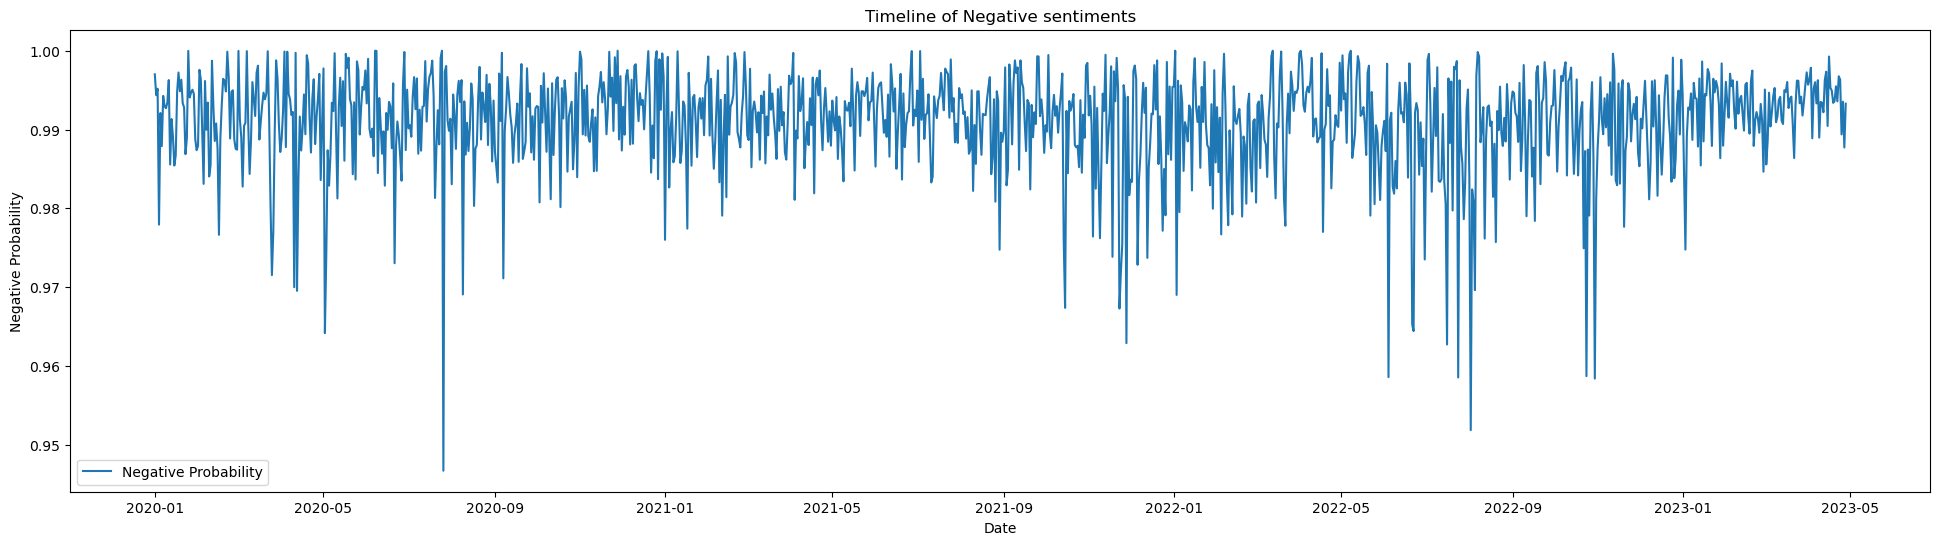

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already performed the groupby and plot operations
plt.figure(figsize=(24, 6))  # Set the desired figure size (width, height)

neg_news_df.groupby(["date"])["Negative Probability"].mean().plot()
plt.title("Timeline of Negative sentiments")
plt.xlabel("Date")
plt.ylabel("Negative Probability")
plt.legend()

plt.show()

In [3]:
news_df_neg_max = neg_news_df[neg_news_df["Negative Probability"]>0.96]

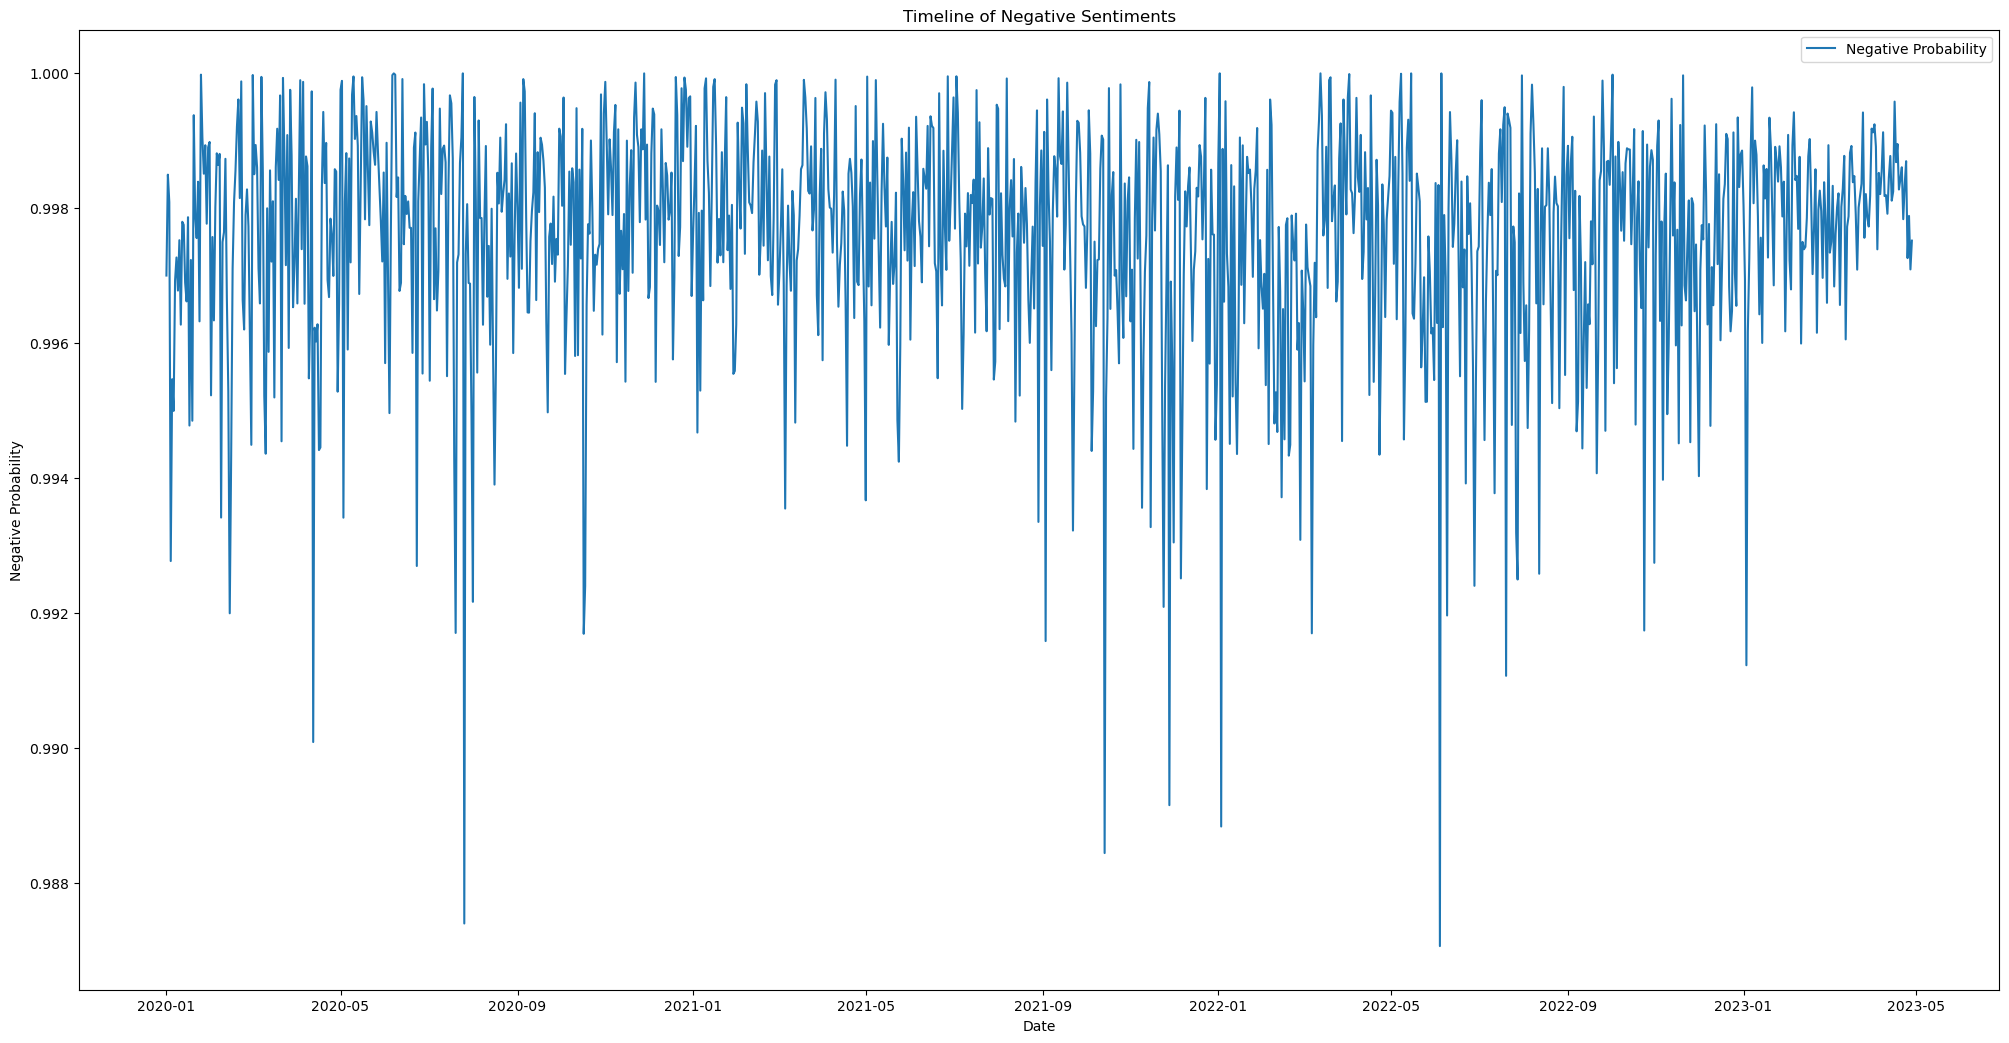

In [4]:
# Assuming you have already performed the groupby and plot operations
fig, ax = plt.subplots(figsize=(24, 12))  # Set the desired figure size (width, height)

news_df_neg_max.groupby(["date"])["Negative Probability"].mean().plot(ax=ax)
plt.title("Timeline of Negative Sentiments")
plt.xlabel("Date")
plt.ylabel("Negative Probability")
plt.legend()

plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9, hspace=0.3)

plt.show()

In [5]:
#Converting date column to datetime format and extracting relevant information
neg_news_df["date"] = pd.to_datetime(neg_news_df["date"])
neg_news_df["year"] = neg_news_df["date"].dt.year
neg_news_df["month"] = neg_news_df["date"].dt.month
neg_news_df["day"] = neg_news_df["date"].dt.day
neg_news_df["dayofweek"] = neg_news_df["date"].dt.dayofweek

In [6]:
neg_topic_counts = neg_news_df.groupby(['Topic Number','year'])['Topic Number'].count().reset_index(name='Counts')

In [7]:
neg_topic_counts

Topic Number  year  Counts
0              -1  2020    4867
1              -1  2021    6493
2              -1  2022    9530
3              -1  2023   11989
4               0  2020     600
..            ...   ...     ...
501           131  2023       1
502           132  2020      25
503           132  2021      33
504           132  2022      23
505           132  2023      19

[506 rows x 3 columns]

In [8]:
neg_topic_counts = neg_topic_counts.drop(neg_topic_counts[(neg_topic_counts['Topic Number'] > 9) | (neg_topic_counts['Topic Number'] < 0)].index)

In [9]:
neg_topic_counts

Topic Number  year  Counts
4              0  2020     600
5              0  2021     771
6              0  2022     696
7              0  2023     315
8              1  2020      47
9              1  2021     155
10             1  2022     807
11             1  2023     547
12             2  2020      99
13             2  2021     375
14             2  2022     496
15             2  2023     345
16             3  2020      36
17             3  2021     169
18             3  2022     291
19             3  2023     783
20             4  2020     174
21             4  2021     190
22             4  2022     209
23             4  2023     443
24             5  2020      27
25             5  2021      14
26             5  2022     124
27             5  2023     797
28             6  2020     184
29             6  2021     456
30             6  2022     221
31             6  2023       6
32             7  2020     185
33             7  2021     241
34             7  2022     225
35             7  2023     190
36             8  2020      21
37             8  2021      30
38             8  2022      17
39             8  2023     772
40             9  2020     160
41             9  2021     158
42             9  2022      98
43             9  2023     390

### Plotting the Timeline of the Top 10 Major topics 

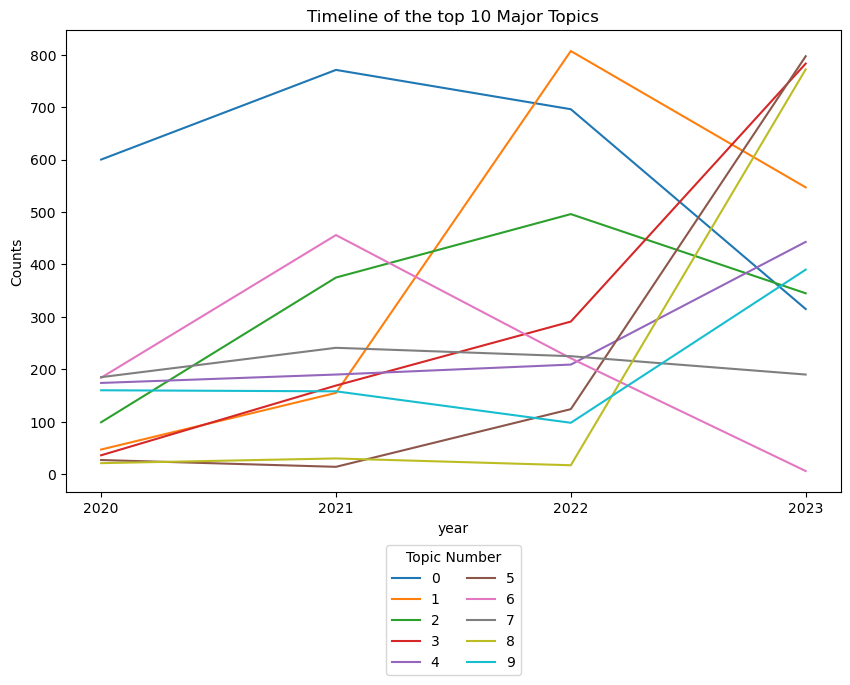

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='Counts', hue='Topic Number', data=neg_topic_counts, palette='tab10')
plt.legend(loc='upper center',title='Topic Number', bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.xticks(neg_topic_counts['year'].unique())
plt.title('Timeline of the top 10 Major Topics')
plt.show()

In [11]:
neg_topic_sent = neg_news_df.groupby(['Topic Number','year'])['Negative Probability'].mean().reset_index(name='Negative Probability')

In [12]:
neg_topic_sent

Topic Number  year  Negative Probability
0              -1  2020              0.991225
1              -1  2021              0.990456
2              -1  2022              0.988406
3              -1  2023              0.992545
4               0  2020              0.993317
..            ...   ...                   ...
501           131  2023              1.000000
502           132  2020              0.994303
503           132  2021              0.998295
504           132  2022              0.998403
505           132  2023              0.995415

[506 rows x 3 columns]

In [13]:
neg_topic_sent = neg_topic_sent.drop(neg_topic_sent[(neg_topic_sent['Topic Number'] > 9) | (neg_topic_sent['Topic Number'] < 0)].index)

In [14]:
neg_topic_sent

Topic Number  year  Negative Probability
4              0  2020              0.993317
5              0  2021              0.987466
6              0  2022              0.987963
7              0  2023              0.986328
8              1  2020              0.992397
9              1  2021              0.976692
10             1  2022              0.981604
11             1  2023              0.981218
12             2  2020              0.993461
13             2  2021              0.993232
14             2  2022              0.993310
15             2  2023              0.992152
16             3  2020              0.989341
17             3  2021              0.994136
18             3  2022              0.990199
19             3  2023              0.991217
20             4  2020              0.994641
21             4  2021              0.988075
22             4  2022              0.991672
23             4  2023              0.996380
24             5  2020              0.992882
25             5  2021              0.995176
26             5  2022              0.994014
27             5  2023              0.993847
28             6  2020              0.991820
29             6  2021              0.994990
30             6  2022              0.994567
31             6  2023              0.986973
32             7  2020              0.991763
33             7  2021              0.992905
34             7  2022              0.991151
35             7  2023              0.990446
36             8  2020              0.995662
37             8  2021              0.998192
38             8  2022              0.988096
39             8  2023              0.996877
40             9  2020              0.991365
41             9  2021              0.992212
42             9  2022              0.994025
43             9  2023              0.993145

### Plotting the Sentiment of the Top 10 Major topics

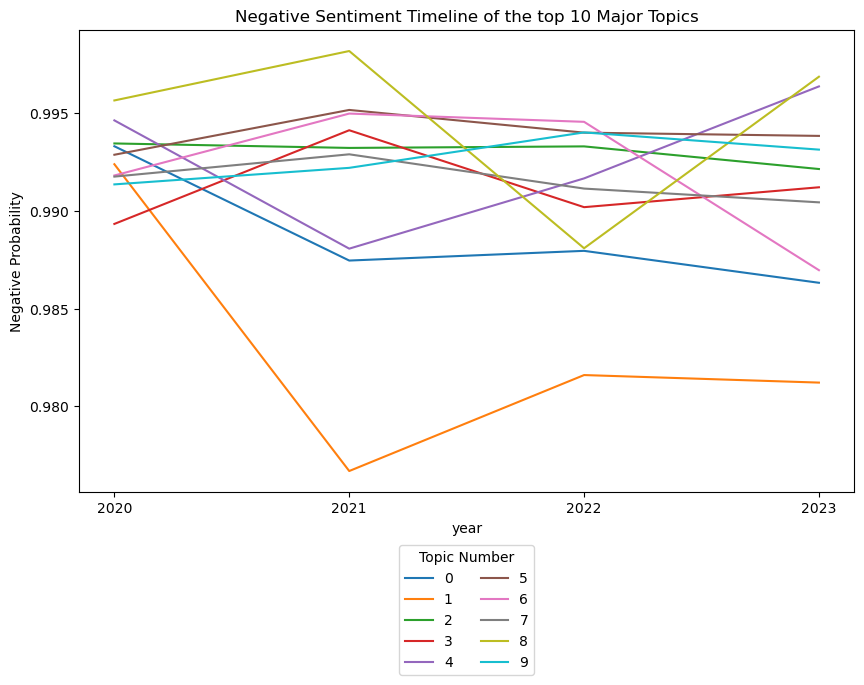

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='Negative Probability', hue='Topic Number', data=neg_topic_sent, palette='tab10')
plt.legend(loc='upper center',title='Topic Number', bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.xticks(neg_topic_sent['year'].unique())
plt.title('Negative Sentiment Timeline of the top 10 Major Topics')
plt.show()